In [58]:
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ralbu85/Lecture_DeepLearning_2022/main/auto.csv')
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,1,27.0
388,4,97.0,52.0,2130.0,24.6,82,2,44.0
389,4,135.0,84.0,2295.0,11.6,82,1,32.0
390,4,120.0,79.0,2625.0,18.6,82,1,28.0


In [3]:
y = df.pop('mpg')
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [4]:
X = df
X

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,1
388,4,97.0,52.0,2130.0,24.6,82,2
389,4,135.0,84.0,2295.0,11.6,82,1
390,4,120.0,79.0,2625.0,18.6,82,1


In [5]:
X.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
dtype: object

In [6]:
X=pd.get_dummies(df, columns=['origin'], prefix='origin')
X

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,1,0,0
388,4,97.0,52.0,2130.0,24.6,82,0,1,0
389,4,135.0,84.0,2295.0,11.6,82,1,0,0
390,4,120.0,79.0,2625.0,18.6,82,1,0,0


In [7]:
from sklearn.preprocessing import StandardScaler

In [13]:
X.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin_1', 'origin_2', 'origin_3'],
      dtype='object')

In [15]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 1.48394702,  1.07728956,  0.66413273, ...,  0.77459667,
        -0.45812285, -0.50239045],
       [ 1.48394702,  1.48873169,  1.57459447, ...,  0.77459667,
        -0.45812285, -0.50239045],
       [ 1.48394702,  1.1825422 ,  1.18439658, ...,  0.77459667,
        -0.45812285, -0.50239045],
       ...,
       [-0.86401356, -0.56847897, -0.53247413, ...,  0.77459667,
        -0.45812285, -0.50239045],
       [-0.86401356, -0.7120053 , -0.66254009, ...,  0.77459667,
        -0.45812285, -0.50239045],
       [-0.86401356, -0.72157372, -0.58450051, ...,  0.77459667,
        -0.45812285, -0.50239045]])

In [27]:
scale_X_df = pd.DataFrame(data = scaler.fit_transform(X), columns=X.columns)
scale_X_df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,0.774597,-0.458123,-0.50239
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,0.774597,-0.458123,-0.50239
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,0.774597,-0.458123,-0.50239
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,0.774597,-0.458123,-0.50239
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,0.774597,-0.458123,-0.50239
...,...,...,...,...,...,...,...,...,...
387,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,1.636410,0.774597,-0.458123,-0.50239
388,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410,-1.290994,2.182821,-0.50239
389,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410,0.774597,-0.458123,-0.50239
390,-0.864014,-0.712005,-0.662540,-0.415627,1.110088,1.636410,0.774597,-0.458123,-0.50239


In [20]:
y.shape

(392,)

In [62]:
train_X, test_X, train_y, test_y = train_test_split(scale_X_df, y, test_size = 0.2)

In [63]:
import numpy as np

In [64]:
scale_X = trian_X.values
scale_X

array([[-0.86401356, -0.70243687,  0.19589527, ..., -1.29099445,
         2.18282063, -0.50239045],
       [-0.86401356, -1.10431059, -0.89665882, ..., -1.29099445,
         2.18282063, -0.50239045],
       [-0.86401356, -0.52063686, -0.37639497, ...,  0.77459667,
        -0.45812285, -0.50239045],
       ...,
       [ 1.48394702,  1.58441591,  1.70466044, ...,  0.77459667,
        -0.45812285, -0.50239045],
       [-0.86401356, -0.932079  , -0.9746984 , ..., -1.29099445,
        -0.45812285,  1.99048369],
       [ 0.30996673,  0.6084369 ,  0.14386888, ...,  0.77459667,
        -0.45812285, -0.50239045]])

In [65]:
y = np.array(train_y)
y

array([29. , 24. , 28. , 18.5, 19. , 26.6, 34. , 12. , 25. , 15.5, 41.5,
       36. , 13. , 31.9, 36. , 31.8, 21.5, 18.1, 17. , 23.9, 13. , 18. ,
       31.5, 18. , 14.5, 27. , 23. , 27.2, 11. , 15.5, 18.6, 22.3, 27. ,
       24.3, 13. , 21. , 36. , 18.2, 30. , 20.6, 19.4, 34.2, 12. , 30.9,
       26. , 28. , 32.4, 32. , 20.3, 35. , 20.2, 27.5, 14. , 27.4, 18. ,
       31. , 15.5, 20.6, 28. , 21. , 36. ,  9. , 15. , 21.5, 23. , 19.9,
       27. , 17.5, 43.1, 12. , 27. , 15. , 24. , 17.5, 33.7, 22. , 19. ,
       13. , 27. , 22. , 20. , 32.4, 29.8, 22. , 16.2, 30.7, 23.8, 22.5,
       44.3, 20. , 26. , 32.1, 26. , 30.5, 13. , 13. , 14. , 28. , 26. ,
       36. , 20.5, 19.2, 18. , 17.7, 20.5, 20.5, 24. , 13. , 16. , 19. ,
       36.1, 26.8, 26. , 32. , 15. , 13. , 24. , 36.1, 26. , 39. , 33. ,
       29.5, 21.6, 11. , 20. , 24. , 16. , 37. , 14. , 44.6, 14. , 27. ,
       29.5, 32. , 25. , 19.8, 19. , 19. , 31. , 24. , 31. , 17. , 21. ,
       33. , 25. , 19. , 31. , 28. , 15.5, 19. , 20

## 딥러닝 회귀모형 만들기

In [40]:
scale_X.shape[1]

9

In [66]:
model = keras.Sequential([
    layers.Dense(16, input_shape = [ X.shape[1] ], activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1), # 회귀문제의 경우 마지막 출력층에 활성화함수를 따로 두지 않는다
])

optimizer = keras.optimizers.RMSprop(0.001)

# metrics는 얼마나 잘 맞췄는지에 대한 평가 지표
model.compile(optimizer = optimizer, loss = 'mse', metrics = ['mse'])

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                160       
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [68]:
model_1 = model.fit(scale_X, y, epochs=500, validation_split=0.2)

Epoch 1/500
1/8 [==>...........................] - ETA: 2s - loss: 666.6218 - mse: 666.6218

2022-10-14 19:54:27.760657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 1s 30ms/step - loss: 639.4098 - mse: 639.4098 - val_loss: 581.0013 - val_mse: 581.0013
Epoch 2/500
8/8 [==============================] - 0s 10ms/step - loss: 623.0631 - mse: 623.0630 - val_loss: 568.1334 - val_mse: 568.1334
Epoch 3/500
8/8 [==============================] - ETA: 0s - loss: 610.7704 - mse: 610.7704

2022-10-14 19:54:28.089025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 11ms/step - loss: 610.7704 - mse: 610.7704 - val_loss: 556.5862 - val_mse: 556.5862
Epoch 4/500
8/8 [==============================] - 0s 12ms/step - loss: 599.3450 - mse: 599.3450 - val_loss: 545.5950 - val_mse: 545.5950
Epoch 5/500
8/8 [==============================] - 0s 11ms/step - loss: 588.3485 - mse: 588.3485 - val_loss: 534.8729 - val_mse: 534.8729
Epoch 6/500
8/8 [==============================] - 0s 11ms/step - loss: 577.7730 - mse: 577.7730 - val_loss: 524.6079 - val_mse: 524.6079
Epoch 7/500
8/8 [==============================] - 0s 11ms/step - loss: 567.1215 - mse: 567.1215 - val_loss: 513.8817 - val_mse: 513.8817
Epoch 8/500
8/8 [==============================] - 0s 11ms/step - loss: 556.1445 - mse: 556.1445 - val_loss: 502.8341 - val_mse: 502.8341
Epoch 9/500
8/8 [==============================] - 0s 11ms/step - loss: 544.9484 - mse: 544.9484 - val_loss: 491.5326 - val_mse: 491.5326
Epoch 10/500
8/8 [============================

In [69]:
model_1_hist = model_1.history
model_1_hist.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [70]:
model_1_hist

{'loss': [639.4097900390625,
  623.0631103515625,
  610.7703857421875,
  599.344970703125,
  588.3485107421875,
  577.7730102539062,
  567.1215209960938,
  556.1444702148438,
  544.9483642578125,
  533.1851806640625,
  520.8299560546875,
  507.8002624511719,
  494.19134521484375,
  479.97412109375,
  465.0372009277344,
  449.6514587402344,
  433.7183837890625,
  417.3692321777344,
  400.34564208984375,
  382.7015686035156,
  364.9496154785156,
  347.08843994140625,
  329.0068054199219,
  310.6188049316406,
  292.4269714355469,
  274.56927490234375,
  257.0361633300781,
  239.91033935546875,
  223.51998901367188,
  208.05470275878906,
  193.775634765625,
  180.59156799316406,
  168.4849395751953,
  157.7677459716797,
  148.61439514160156,
  140.85877990722656,
  134.3050537109375,
  128.74908447265625,
  124.2258071899414,
  120.1742172241211,
  116.54853820800781,
  113.30423736572266,
  110.13680267333984,
  107.11820220947266,
  104.19894409179688,
  101.7140121459961,
  98.891059875

In [72]:
import matplotlib.pyplot as plt

(0.0, 200.0)

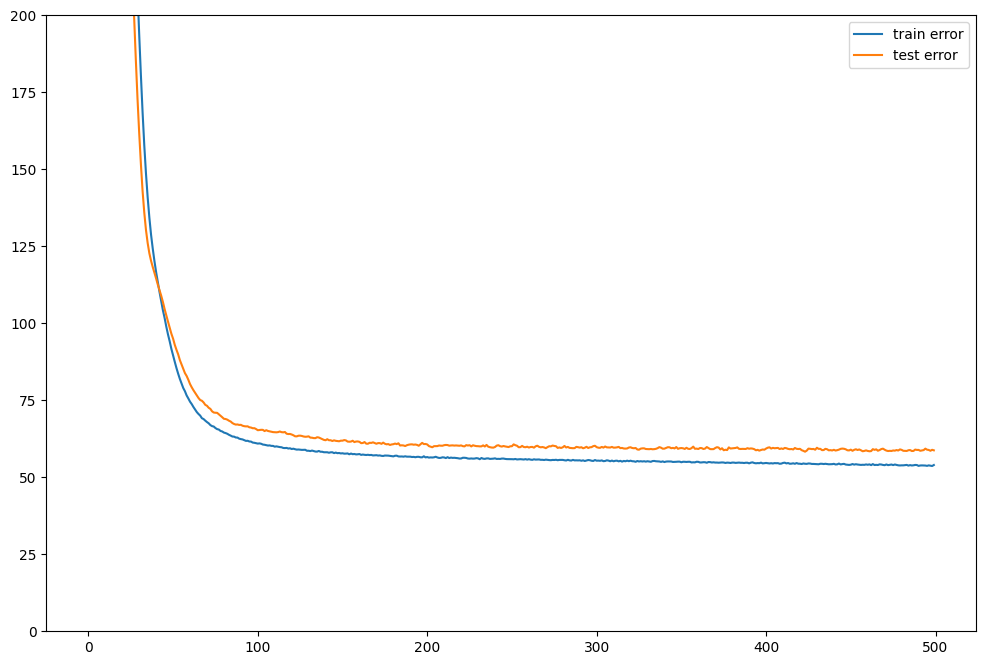

In [75]:
plt.figure(figsize=(12, 8))

plt.plot(model_1_hist['loss'], label= 'train error')
plt.plot(model_1_hist['val_loss'], label= 'test error')

plt.legend()
plt.ylim([0, 200])


In [85]:
a = model.predict(test_X)

3/3 [==============================] - 0s 8ms/step


In [93]:
a[:,0]

array([26.991415, 25.96665 , 23.563723, 29.15695 , 22.02133 , 23.848373,
       24.705303, 27.90448 , 21.075886, 20.917494, 23.37583 , 22.338667,
       19.607105, 30.05462 , 21.995562, 26.135372, 22.493507, 28.784801,
       26.09    , 22.037758, 23.581516, 22.6177  , 22.43707 , 21.894043,
       19.718023, 23.028606, 22.200804, 27.392221, 27.191658, 30.393871,
       24.70991 , 23.018074, 26.014984, 25.277742, 23.820576, 20.502283,
       26.377813, 22.695965, 19.174198, 24.544695, 26.819605, 22.525068,
       22.206604, 23.29872 , 19.671423, 23.728342, 22.385077, 23.451025,
       23.37711 , 20.41306 , 20.829126, 22.215656, 27.158846, 20.151348,
       27.195513, 26.612682, 21.856823, 22.5815  , 22.242044, 23.033575,
       21.959278, 27.982622, 19.621164, 21.486803, 21.808779, 21.853756,
       24.645298, 23.098627, 21.856293, 26.818144, 24.730398, 22.821175,
       20.647028, 24.799046, 24.568579, 22.668427, 24.242832, 27.693792,
       23.411758], dtype=float32)

In [95]:
test_y

array([25. , 17. , 25. , 19. , 35.7, 15.5, 13. , 14. , 37.2, 30. , 18.1,
       17.6, 37.7, 18. , 29. , 25. , 20.2, 25. , 24. , 14. , 26. , 19.1,
       25.5, 37.3, 31.6, 30. , 15. , 25. , 15. , 27.2, 26. , 38. , 21. ,
       29. , 18. , 34.4, 19. , 13. , 31. , 28. , 18. , 15. , 39.4, 27.9,
       32.3, 26. , 19.4, 25. , 16. , 40.8, 38. , 11. , 23. , 38. , 28. ,
       15. , 20. , 15. , 38. , 14. , 25.1, 14. , 28. , 28.4, 29. , 34.7,
       21. , 18. , 25.5, 26. , 28. , 25.4, 34.1, 20. , 26. , 28.8, 17. ,
       14. , 16.5])

In [105]:
pd.DataFrame(a, test_y)

,0
25.0,26.991415
17.0,25.966650
25.0,23.563723
19.0,29.156950
35.7,22.021330
...,...
26.0,24.568579
28.8,22.668427
17.0,24.242832
14.0,27.693792


In [78]:
mean_squared_error(model.predict(test_X), test_y)

3/3 [==============================] - 0s 3ms/step


85.65512696313475